# House prices in Nigeria?
## Business Understaning

For this project, I am interested in using the Nigeria house listing data 2021 to better understand and answer the following question:


*	What are the most common real estates listed for sale in Nigeria?
*	What cities or towns have the most listings?
*	Where are lowest price and highest price listings and what are the price estimates. 




In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
%matplotlib inline

## Understanding the Data
First, take a look at the data to understand features, data types, shapes etc collected about the data

In [164]:
#Read the data from a CSV file
df_house = pd.read_csv('nigeria_houses_data.csv')
df_house.head()

,bedrooms,bathrooms,toilets,parking_space,title,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0


In [165]:
#Rename a column in the dataframe to a desired name to match the object.

df_house.rename(columns={'title': 'style'}, inplace = True)
df_house

,bedrooms,bathrooms,toilets,parking_space,style,town,state,price
0,6.0,5.0,5.0,4.0,Detached Duplex,Mabushi,Abuja,450000000.0
1,4.0,5.0,5.0,4.0,Terraced Duplexes,Katampe,Abuja,800000000.0
2,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,120000000.0
3,4.0,4.0,5.0,6.0,Detached Duplex,Ajah,Lagos,40000000.0
4,4.0,4.0,5.0,2.0,Semi Detached Duplex,Lekki,Lagos,75000000.0
...,...,...,...,...,...,...,...,...
24321,2.0,2.0,2.0,4.0,Block of Flats,Kabusa,Abuja,15000000.0
24322,4.0,5.0,5.0,4.0,Block of Flats,Ado-Odo/Ota,Ogun,25000000.0
24323,4.0,5.0,5.0,4.0,Detached Duplex,Lekki,Lagos,68000000.0
24324,3.0,4.0,4.0,3.0,Block of Flats,Victoria Island (VI),Lagos,78000000.0



## Data Preparation

Use the analysis below to prepare your data for analysis



In [166]:

#Below code gives information about the number of columns and number of rows.
df_house.shape

(24326, 8)

In [167]:
#Below code show the data types and their counts in the dataset. This is to ensure you know what suitable operations to perform
df_house.dtypes.value_counts()

float64    5
object     3
dtype: int64

In [168]:
#Below code shows the features and what data type they are stored as in the dataset.
df_house.dtypes

#Note: For datasets with lots of columns, feel free to use e.g df_house.dtypes[df_house.dtypes=='float64']. You can use the same for objects or int64 data types

bedrooms         float64
bathrooms        float64
toilets          float64
parking_space    float64
style             object
town              object
state             object
price            float64
dtype: object

In [169]:

#Use the below code to check for number of missing values in each column in descending order
df_house.isnull().sum().sort_values(ascending=False)

bedrooms         0
bathrooms        0
toilets          0
parking_space    0
style            0
town             0
state            0
price            0
dtype: int64

In [170]:
#The data did not have any missing value. Use the below code to show names that do not have any missing values and all values are unique (different from each other) 
df_house.nunique()[df_house.nunique()==len(df_house)]

Series([], dtype: int64)

In [171]:
#Below code shows the columns names that have some missing values and number of unique values in that column
df_house.nunique()[df_house.nunique() != len(df_house)].sort_values(ascending=False)

price            539
town             189
state             25
bedrooms           9
bathrooms          9
toilets            9
parking_space      9
style              7
dtype: int64


## Analysis and Visualization



In [173]:
# A functions used to display your data in a bar chart format.
def display_chart(df_house, column, style):
    '''
    Displays a chart with a title
    
    Parameters:
    df_house: a dataframe
    column: the column we want to display
    title: the title of the chart
    
    Returns:
    None
    
    '''
    show_values = df_house[column].value_counts()
    (show_values[:30]/df_house.shape[0]).plot(kind="bar");
    plt.title(style);

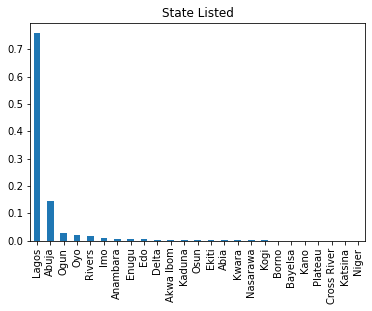

In [174]:
#Provide a pandas series of the counts for each town
display_chart(df_house, "state", "State Listed")

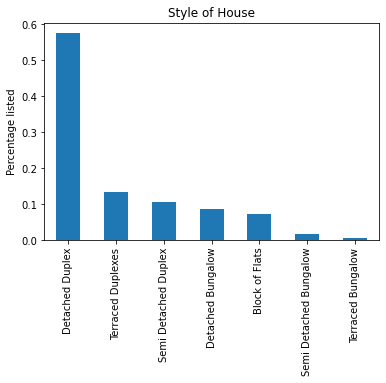

In [175]:
#Question 1. What are the most common stye of houses listed for sale in Nigeria

#Provide a pandas series of the counts for each Style
plt.ylabel('Percentage listed')
display_chart(df_house, "style", "Style of House")

In [176]:
#Below code shows the number of each unique values in the 'style' column.
df_house['style'].value_counts().sort_values(ascending=False)

Detached Duplex           13992
Terraced Duplexes          3237
Semi Detached Duplex       2615
Detached Bungalow          2108
Block of Flats             1745
Semi Detached Bungalow      452
Terraced Bungalow           177
Name: style, dtype: int64

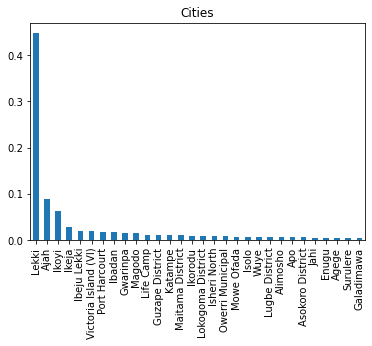

In [156]:
#Question 2. What cities have the most houses listed for Sales in Nigeria
#Provide a pandas series of the counts for each town
display_chart(df_house, "town", "Cities")

In [177]:
#Below code shows the number of each unique values in the 'town' column.
pd.set_option('display.max_rows', 50)
df_house['town'].value_counts().sort_values(ascending=False)

Lekki          10895
Ajah            2164
Ikoyi           1547
Ikeja            688
Ibeju Lekki      503
               ...  
Oyo West           1
Orile              1
Nassarawa          1
Egbeda             1
Oke-Odo            1
Name: town, Length: 189, dtype: int64

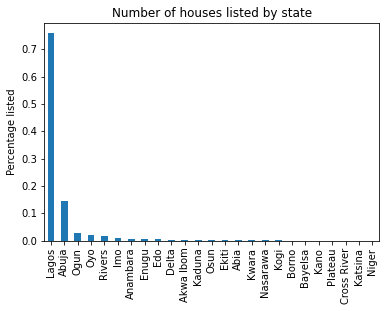

In [178]:
#Question 1. What are the most common stye of houses listed for sale in Nigeria

#Provide a pandas series of the counts for each Style
plt.ylabel('Percentage listed')
display_chart(df_house, "state", "Number of houses listed by state")

In [179]:
#Below code shows the number of each unique values in the 'town' column.
pd.set_option('display.max_rows', 50)
df_house['state'].value_counts().sort_values(ascending=False)

Lagos          18445
Abuja           3524
Ogun             637
Oyo              477
Rivers           444
Imo              246
Anambara         145
Enugu            128
Edo              100
Delta             63
Akwa Ibom         25
Kaduna            23
Osun              12
Ekiti              9
Abia               9
Kwara              9
Nasarawa           9
Kogi               8
Borno              2
Bayelsa            2
Kano               2
Plateau            2
Cross River        2
Katsina            2
Niger              1
Name: state, dtype: int64

In [180]:
print(df_house.groupby('town').price.mean())

town
Aba               9.562500e+07
Abeokuta North    2.880000e+07
Abeokuta South    3.564516e+07
Abraka            3.500000e+07
Ado-Ekiti         5.488889e+07
                      ...     
Wuse 2            2.693368e+08
Wuye              1.047586e+08
Yaba              8.722989e+07
Yenagoa           9.000000e+07
Yewa South        1.500000e+06
Name: price, Length: 189, dtype: float64


In [146]:
#df_house.nlargest(10, 'price', keep='last') # when using keep = 'all', all duplicate values are maintained. keep='last', ties are resolved in reverse order:
df_house.nlargest(10, 'price')

,bedrooms,bathrooms,toilets,parking_space,style,town,state,price
4096,7.0,7.0,8.0,8.0,Detached Duplex,Ikoyi,Lagos,1.800000e+12
6632,4.0,4.0,5.0,4.0,Semi Detached Duplex,Ikoyi,Lagos,4.500000e+11
15962,9.0,9.0,1.0,4.0,Detached Duplex,Lekki,Lagos,3.500000e+11
4327,5.0,5.0,6.0,4.0,Detached Duplex,Lekki,Lagos,1.600000e+11
7098,5.0,5.0,6.0,4.0,Semi Detached Duplex,Lekki,Lagos,1.250000e+11
15836,5.0,6.0,7.0,4.0,Terraced Duplexes,Guzape District,Abuja,8.500000e+10
15806,5.0,5.0,5.0,1.0,Detached Duplex,Ifako-Ijaiye,Lagos,5.500000e+10
17383,4.0,4.0,5.0,3.0,Detached Duplex,Ajah,Lagos,5.000000e+10
13490,3.0,3.0,3.0,4.0,Semi Detached Duplex,Ajah,Lagos,4.200000e+10
504,4.0,5.0,5.0,4.0,Block of Flats,Ikoyi,Lagos,1.500000e+10


In [147]:
df_house.nsmallest(10, 'price')

,bedrooms,bathrooms,toilets,parking_space,style,town,state,price
2693,2.0,3.0,3.0,4.0,Terraced Duplexes,Ibeju Lekki,Lagos,90000.0
20146,2.0,2.0,3.0,4.0,Detached Bungalow,Mowe Town,Ogun,100000.0
2385,5.0,7.0,7.0,4.0,Semi Detached Duplex,Maitama District,Abuja,110000.0
2810,7.0,5.0,5.0,4.0,Detached Duplex,Isheri North,Lagos,350000.0
17645,7.0,7.0,8.0,6.0,Detached Duplex,Isheri North,Lagos,350000.0
17940,7.0,5.0,5.0,4.0,Detached Duplex,Isheri North,Lagos,350000.0
7083,5.0,5.0,6.0,4.0,Detached Duplex,Lekki,Lagos,400000.0
2449,2.0,2.0,2.0,1.0,Detached Duplex,Asokoro District,Abuja,462837.0
4176,2.0,7.0,8.0,7.0,Detached Duplex,Jos South,Plateau,500000.0
14555,4.0,4.0,5.0,4.0,Semi Detached Duplex,Ikoyi,Lagos,660000.0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000017793B50B88>,
      dtype=object)

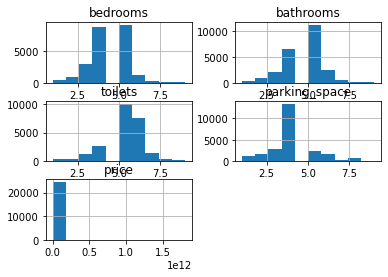

In [181]:
#Showing histograms of data
df_house.hist()

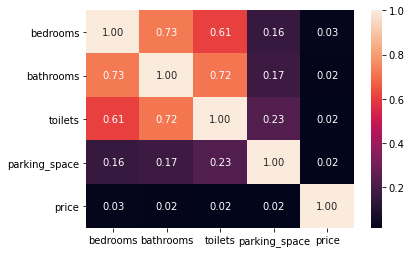

In [182]:
## Trying to show correlation between features

sns.heatmap(df_house.corr(), annot=True, fmt=".2f");

In [183]:
## Attempt at trying to fit a model :). I have a long way to go

X = df_house[['bedrooms', 'bathrooms', 'parking_space', 'toilets']]
y = df_house['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42)

lm_model = LinearRegression(normalize=True) # Here you could set any hyperparameters of your model
lm_model.fit(X_train, y_train)

y_test_preds = lm_model.predict(X_test)
print(r2_score(y_test, y_test_preds)) 
print(mean_squared_error(y_test, y_test_preds))


-2.599915425164349
3.080389805795119e+17
